# Polynomial Linear Regression 

When dependent feature changes non-linearly with the independent feature(s) we cannot use a Simple Linear Regression model. We then use tranformation and fit the data into a Polynomial Linear Regression model.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("7thPayMatrix.csv")
print(data)

    Level  Basic Salary
0       1         18000
1       2         19900
2       3         21700
3       4         25500
4       5         29200
5       6         35400
6       7         44900
7       8         47600
8       9         53100
9      10         56100
10     11         67700
11     12         78800
12     13        118500
13     14        131100
14     15        144200
15     16        182200
16     17        205400
17     18        225000
18     19        250000


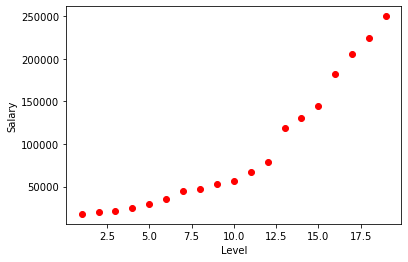

In [12]:
x = data.iloc[:,0:1].values
y = data.iloc[:,1:2].values
plt.scatter(x,y,color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [13]:
#transforming data into polynomial type

from sklearn.preprocessing import PolynomialFeatures
obj = PolynomialFeatures(degree = 3)
x_transformed = obj.fit_transform(x) #tranforming data
print(x_transformed)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.100e+01 1.210e+02 1.331e+03]
 [1.000e+00 1.200e+01 1.440e+02 1.728e+03]
 [1.000e+00 1.300e+01 1.690e+02 2.197e+03]
 [1.000e+00 1.400e+01 1.960e+02 2.744e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]
 [1.000e+00 1.600e+01 2.560e+02 4.096e+03]
 [1.000e+00 1.700e+01 2.890e+02 4.913e+03]
 [1.000e+00 1.800e+01 3.240e+02 5.832e+03]
 [1.000e+00 1.900e+01 3.610e+02 6.859e+03]]


In [14]:
#preprocessing
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_transformed,y)  #training data

LinearRegression()

In [15]:
y1=model.predict(x_transformed)
print(y1)

[[ 20657.41626794]
 [ 20796.33173844]
 [ 21860.9531851 ]
 [ 23965.0694249 ]
 [ 27222.46927479]
 [ 31746.94155174]
 [ 37652.27507271]
 [ 45052.25865466]
 [ 54060.68111455]
 [ 64791.33126935]
 [ 77357.99793602]
 [ 91874.46993151]
 [108454.5360728 ]
 [127211.98517685]
 [148260.60606061]
 [171714.18754105]
 [197686.51843513]
 [226291.38755981]
 [257642.58373206]]


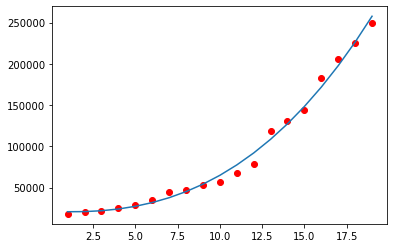

In [16]:
#graph
plt.scatter(x,y,color="red")
plt.plot(x,y1)
plt.show()

### Analysis of model

In [17]:
from sklearn import metrics
print("Mean absolute erroe : ",metrics.mean_absolute_error(y,y1))
print("Mean squared error : ",metrics.mean_squared_error(y,y1))
print("Root mean squared error : ",np.sqrt(metrics.mean_squared_error(y,y1)))

Mean absolute erroe :  5167.764083724661
Mean squared error :  41539334.032026336
Root mean squared error :  6445.101553274885


***Select degree by looking at the error metrics***

In [18]:
print(model.predict(obj.fit_transform([[8.5]])))
#can NOT pass direct value; transform first

[[49348.3032238]]


In [19]:
#result using a linear regression model; for comparision

model1=LinearRegression()
model1.fit(x,y)
print(model1.predict([[8.5]]))

[[73356.57894737]]


## Handling categorical values
* pandas used

In [21]:
import pandas as pd
df = pd.read_csv("demo.csv",index_col=0)
print(df)
df.Qualification = pd.Categorical(df.Qualification,['Bachelor','Master','PhD'],ordered=True)
# bachelor = 0, Master = 1, PhD = 2
print()
print(df.Qualification)
df.Qualification = df.Qualification.cat.codes
print()
print(df.Qualification)
print()
print(df)

    Age Qualification  Gender  Salary
id                                   
1    28        Master    Male   50000
2    30      Bachelor  Female   60000
3    24        Master    Male   45000
4    27           PhD    Male   52000
5    28        Master    Male   53000
6    20        Master  Female   42000
7    21      Bachelor    Male   42000
8    20      Bachelor  Female   30000
9    26           PhD    Male   49000
10   25      Bachelor    Male   49000

id
1       Master
2     Bachelor
3       Master
4          PhD
5       Master
6       Master
7     Bachelor
8     Bachelor
9          PhD
10    Bachelor
Name: Qualification, dtype: category
Categories (3, object): [Bachelor < Master < PhD]

id
1     1
2     0
3     1
4     2
5     1
6     1
7     0
8     0
9     2
10    0
Name: Qualification, dtype: int8

    Age  Qualification  Gender  Salary
id                                    
1    28              1    Male   50000
2    30              0  Female   60000
3    24              1    Mal

Note the conversion of catergorical data *Qualification* to numerical datatype.